## Preparation

### Akses data dari Google Drive

In [1]:
!pip install ipython-autotime
%load_ext autotime

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Dataset/data.csv')
data.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.8 MB/s eta 0:00:00
Mounted at /content/drive


,Nama,Jenis Kelamin
0,Aam,Laki-Laki
1,Aang,Laki-Laki
2,Aarief,Laki-Laki
3,Abba,Laki-Laki
4,Abbie,Laki-Laki


time: 1min 26s (started: 2024-07-22 08:10:43 +00:00)


### Periksa Data (Informasi Mengenai Data)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628 entries, 0 to 3627
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nama           3628 non-null   object
 1   Jenis Kelamin  3628 non-null   object
dtypes: object(2)
memory usage: 56.8+ KB
time: 23 ms (started: 2024-07-22 08:12:09 +00:00)


#### Periksa Baris Duplikat

In [3]:
baris_duplikat = data[data.duplicated()]
baris_duplikat

,Nama,Jenis Kelamin
21,Adhi,Laki-Laki
30,Adi,Laki-Laki
31,Adi,Laki-Laki
32,Adi,Laki-Laki
70,Agung,Laki-Laki
...,...,...
3597,Yuni,Perempuan
3598,Yuni,Perempuan
3599,Yuni,Perempuan
3605,Yunita,Perempuan


time: 13.9 ms (started: 2024-07-22 08:12:09 +00:00)


In [4]:
data[data['Nama'] == 'Adhi']

,Nama,Jenis Kelamin
20,Adhi,Laki-Laki
21,Adhi,Laki-Laki


time: 9.01 ms (started: 2024-07-22 08:12:09 +00:00)


In [5]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3280 entries, 0 to 3627
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nama           3280 non-null   object
 1   Jenis Kelamin  3280 non-null   object
dtypes: object(2)
memory usage: 76.9+ KB
time: 7.31 ms (started: 2024-07-22 08:12:09 +00:00)


Hapus Baris yang duplikat

In [6]:
data[data['Nama'] == 'Adhi']

,Nama,Jenis Kelamin
20,Adhi,Laki-Laki


time: 8.54 ms (started: 2024-07-22 08:12:09 +00:00)


In [7]:
data['Jenis Kelamin'].value_counts()

Jenis Kelamin
Perempuan    1652
Laki-Laki    1628
Name: count, dtype: int64

time: 5.32 ms (started: 2024-07-22 08:12:09 +00:00)


### Visualisasikan Perbandingan Jumlah Datanya

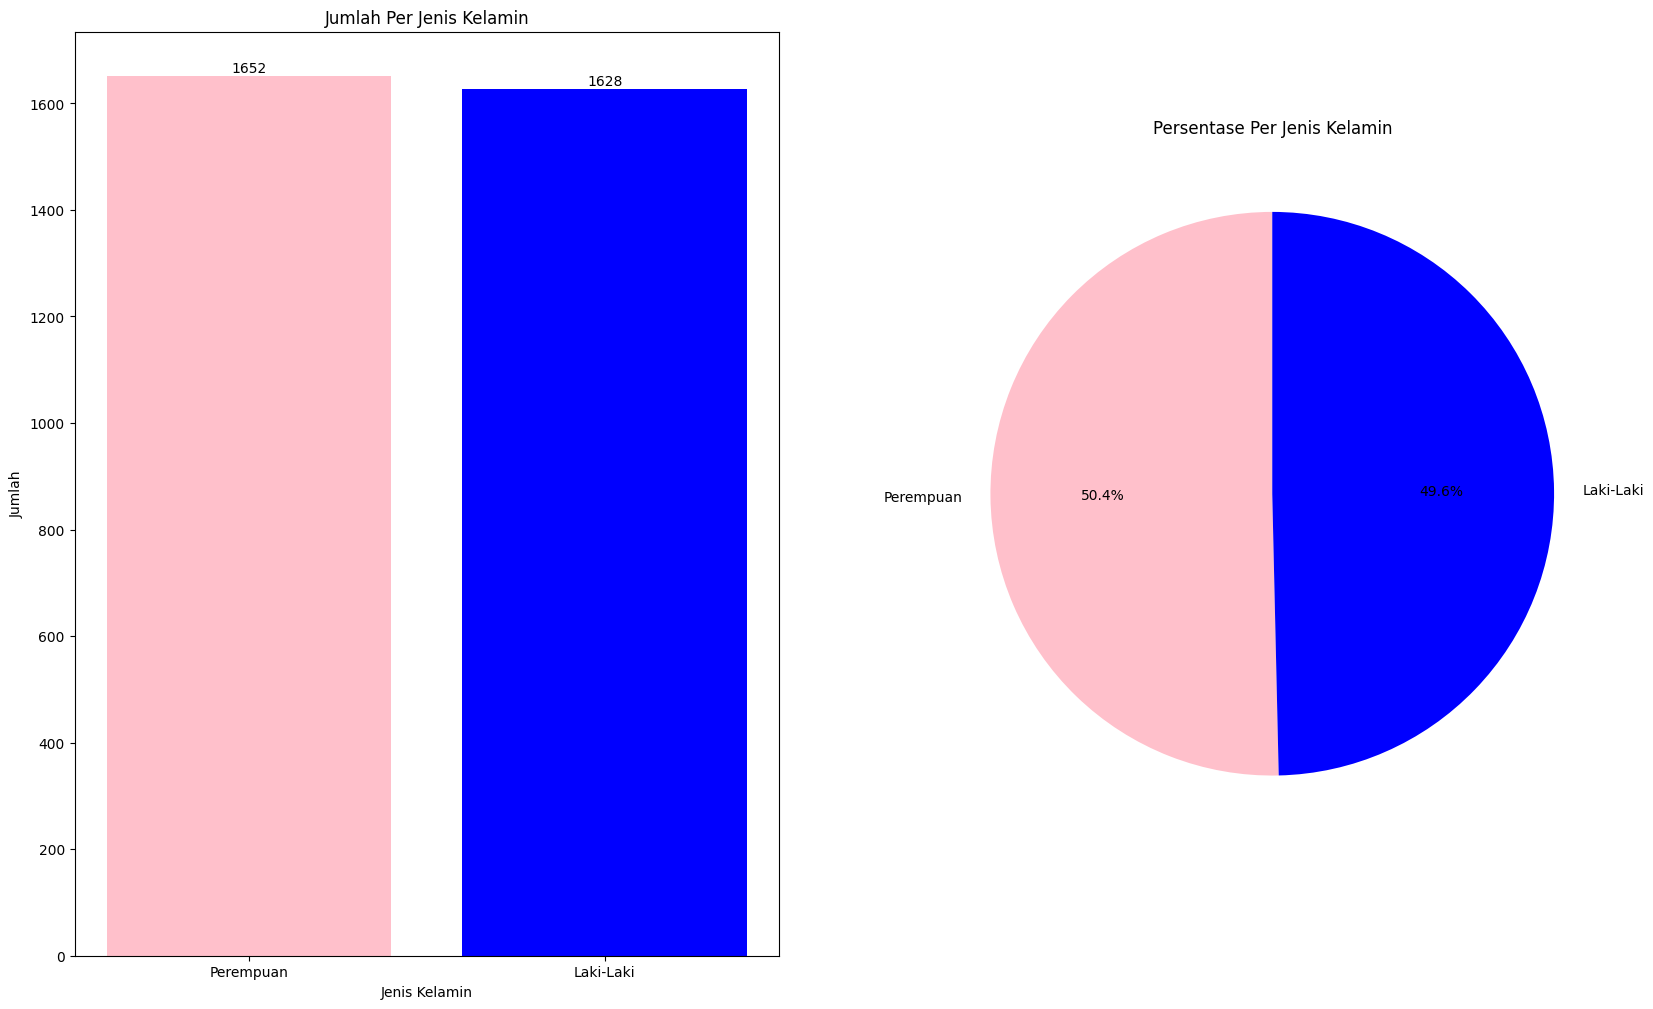

time: 442 ms (started: 2024-07-22 08:12:09 +00:00)


In [8]:
import matplotlib.pyplot as plt

gender_count = data['Jenis Kelamin'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 12))

# Buat Bar Chart
bar_chart = ax1.bar(gender_count.index, gender_count, color = ['pink', 'blue'])
for bar in bar_chart:
  height = bar.get_height()
  ax1.annotate(f'{height}', xy = (bar.get_x() + bar.get_width() / 2, height), ha = 'center', va = 'bottom')

ax1.set_title('Jumlah Per Jenis Kelamin')
ax1.set_xlabel('Jenis Kelamin')
ax1.set_ylabel('Jumlah')
ax1.set_xticks(gender_count.index)
ax1.set_xticklabels(gender_count.index, rotation = 0)

# Buat Pie Chart
pie_chart = ax2.pie(gender_count, labels = gender_count.index, autopct = '%1.1f%%', colors = ['pink', 'blue'], startangle = 90)
ax2.set_title('Persentase Per Jenis Kelamin')

plt.show()

Hanya ada 2 kategori jenis kelamin karena di websitenya cuma ada 2. Tidak ada 'Her/His/Them/They dan sebagainya'. Jumlah masing-masing kategori relatif seimbang/balance

## Preprocessing

### 1. Lowercasing

In [9]:
data['Nama'] = data['Nama'].str.lower()

time: 6.2 ms (started: 2024-07-22 08:12:10 +00:00)


#### 2. Split ke Individual Karakter

In [10]:
data['Nama'] = [list(name) for name in data['Nama']]

time: 2.92 ms (started: 2024-07-22 08:12:10 +00:00)


In [11]:
data['Nama']

0                [a, a, m]
1             [a, a, n, g]
2       [a, a, r, i, e, f]
3             [a, b, b, a]
4          [a, b, b, i, e]
               ...        
3623    [z, a, r, i, n, a]
3624       [z, i, d, n, i]
3625          [z, i, t, a]
3626       [z, i, t, n, i]
3627    [z, u, a, d, a, h]
Name: Nama, Length: 3280, dtype: object

time: 6.72 ms (started: 2024-07-22 08:12:10 +00:00)


#### 3. Padding agar nama memiliki panjang yang sama

Dengan menambahkan spasi

In [12]:
nama_terpanjang = data['Nama'].apply(len).idxmax()
nama_panjang = data.loc[nama_terpanjang, 'Nama']

print(f"Nama dengan karakter paling panjang: {nama_panjang} \ndengan panjang: {len(nama_panjang)} karakter")

Nama dengan karakter paling panjang: ['p', 'r', 'a', 'm', 'o', 'd', 'h', 'a', 'w', 'a', 'r', 'd', 'h', 'a', 'n', 'i'] 
dengan panjang: 16 karakter
time: 2.23 ms (started: 2024-07-22 08:12:10 +00:00)


In [13]:
panjang_nama = 20
data['Nama'] = [
    (name + [' '] * panjang_nama)[:panjang_nama]
    for name in data['Nama']
]

time: 3.03 ms (started: 2024-07-22 08:12:10 +00:00)


In [14]:
data['Nama']

0       [a, a, m,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
1       [a, a, n, g,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
2       [a, a, r, i, e, f,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
3       [a, b, b, a,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
4       [a, b, b, i, e,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
                              ...                        
3623    [z, a, r, i, n, a,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
3624    [z, i, d, n, i,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
3625    [z, i, t, a,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
3626    [z, i, t, n, i,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
3627    [z, u, a, d, a, h,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
Name: Nama, Length: 3280, dtype: object

time: 6.19 ms (started: 2024-07-22 08:12:10 +00:00)


#### 4. Encoding nama ke array angka

In [15]:
data['Nama'] = [
    [
         max(0.0, ord(char)-96.0)
        for char in name
    ]
    for name in data['Nama']
]

data['Nama']

0       [1.0, 1.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1       [1.0, 1.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2       [1.0, 1.0, 18.0, 9.0, 5.0, 6.0, 0.0, 0.0, 0.0,...
3       [1.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [1.0, 2.0, 2.0, 9.0, 5.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
3623    [26.0, 1.0, 18.0, 9.0, 14.0, 1.0, 0.0, 0.0, 0....
3624    [26.0, 9.0, 4.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0...
3625    [26.0, 9.0, 20.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0...
3626    [26.0, 9.0, 20.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0....
3627    [26.0, 21.0, 1.0, 4.0, 1.0, 8.0, 0.0, 0.0, 0.0...
Name: Nama, Length: 3280, dtype: object

time: 29.1 ms (started: 2024-07-22 08:12:10 +00:00)


#### 5. Encoding Jenis Kelamin

In [16]:
data['Jenis Kelamin'] = data['Jenis Kelamin'].map({'Laki-Laki': 1, 'Perempuan': 0})
data['Jenis Kelamin']

0       1
1       1
2       1
3       1
4       1
       ..
3623    0
3624    0
3625    0
3626    0
3627    0
Name: Jenis Kelamin, Length: 3280, dtype: int64

time: 5.61 ms (started: 2024-07-22 08:12:10 +00:00)


In [17]:
data.sample(7)

,Nama,Jenis Kelamin
953,"[13.0, 1.0, 8.0, 1.0, 4.0, 9.0, 0.0, 0.0, 0.0,...",1
2817,"[14.0, 1.0, 4.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",0
504,"[5.0, 13.0, 2.0, 1.0, 18.0, 1.0, 0.0, 0.0, 0.0...",1
3209,"[18.0, 15.0, 8.0, 13.0, 1.0, 23.0, 1.0, 20.0, ...",0
1872,"[1.0, 14.0, 9.0, 14.0, 4.0, 1.0, 0.0, 0.0, 0.0...",0
3022,"[16.0, 21.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0....",0
996,"[13.0, 21.0, 14.0, 9.0, 18.0, 0.0, 0.0, 0.0, 0...",1


time: 11.3 ms (started: 2024-07-22 08:12:10 +00:00)


## Modelling

#### Bagi Data antara Fitur dan Label

In [18]:
import numpy as np

X = np.asarray(data['Nama'].values.tolist())
y = np.asarray(data['Jenis Kelamin'].values.tolist())

time: 8.78 ms (started: 2024-07-22 08:12:10 +00:00)


#### Bagi Data jadi train dan test dengan 8:2

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time: 1.21 s (started: 2024-07-22 08:12:10 +00:00)


## Bangun Arsitektur Klasifikasi

### 1. KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Definisikan model KNN
model_knn = KNeighborsClassifier()

# Tentukan grid dari hyperparameter yang dicoba
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'p': [1, 2]  # Digunakan oleh metrik 'minkowski'
}

time: 192 ms (started: 2024-07-22 08:12:11 +00:00)


In [21]:
from sklearn.model_selection import GridSearchCV

# Lakukan grid search dengan cross-validation 5-fold
grid_search_knn = GridSearchCV(model_knn, param_grid_knn, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor Cross-Validation terbaik
print("Parameter terbaik KNN:", grid_search_knn.best_params_)
print("Skor Cross-Validation terbaik:", grid_search_knn.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Parameter terbaik KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Skor Cross-Validation terbaik: 0.661213376953835
time: 29.5 s (started: 2024-07-22 08:12:11 +00:00)


In [22]:
from sklearn.metrics import classification_report

# Evaluasi model terbaik pada data testing
best_model_knn = grid_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn, target_names=['Perempuan', 'Laki-Laki']))

              precision    recall  f1-score   support

   Perempuan       0.61      0.65      0.63       321
   Laki-Laki       0.64      0.60      0.62       335

    accuracy                           0.63       656
   macro avg       0.63      0.63      0.63       656
weighted avg       0.63      0.63      0.63       656

time: 234 ms (started: 2024-07-22 08:12:41 +00:00)


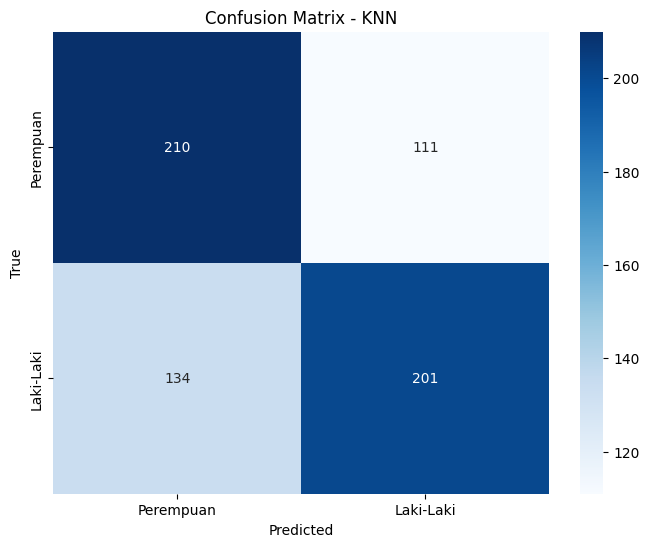

time: 1.01 s (started: 2024-07-22 08:12:41 +00:00)


In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Perempuan', 'Laki-Laki'], yticklabels=['Perempuan', 'Laki-Laki'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_knn.png')
plt.show()

In [24]:
import joblib

# Simpan model ke dalam file
model_file = 'knn.pkl'
joblib.dump(best_model_knn, model_file)
print(f"Model telah disimpan sebagai {model_file}")

Model telah disimpan sebagai knn.pkl
time: 3.98 ms (started: 2024-07-22 08:12:42 +00:00)


### 2. Random Forest

In [25]:
# Bangun Arsitektur Klasifikasi dengan Random Forest
from sklearn.ensemble import RandomForestClassifier

# Definisikan model RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)

# Tentukan grid dari hyperparameter yang dicoba
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

time: 107 ms (started: 2024-07-22 08:12:42 +00:00)


In [26]:
# Lakukan grid search dengan cross-validation 5-fold
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor Cross-Validation terbaik
print("Parameter terbaik Random Forest:", grid_search_rf.best_params_)
print("Skor Cross-Validation terbaik:", grid_search_rf.best_score_)

Parameter terbaik Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Skor Cross-Validation terbaik: 0.7263693202471828
time: 8min 11s (started: 2024-07-22 08:12:42 +00:00)


In [27]:
# Evaluasi model terbaik pada data testing
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf, target_names=['Perempuan', 'Laki-Laki']))

              precision    recall  f1-score   support

   Perempuan       0.72      0.79      0.75       321
   Laki-Laki       0.77      0.70      0.74       335

    accuracy                           0.74       656
   macro avg       0.75      0.74      0.74       656
weighted avg       0.75      0.74      0.74       656

time: 60.9 ms (started: 2024-07-22 08:20:54 +00:00)


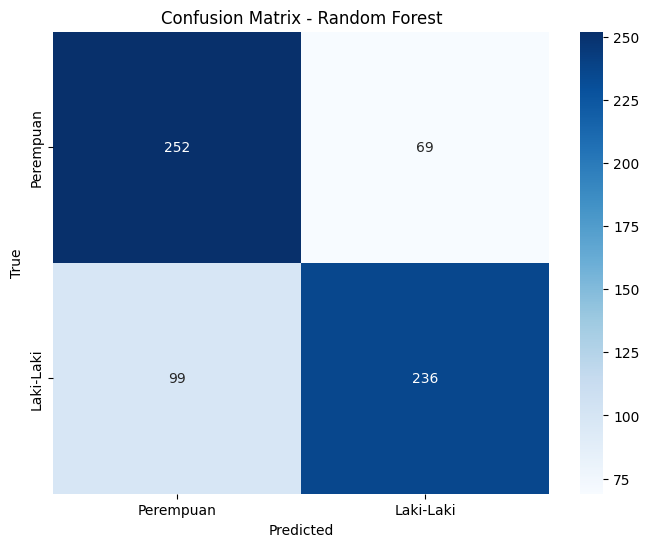

time: 341 ms (started: 2024-07-22 08:20:54 +00:00)


In [28]:
# Buat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Perempuan', 'Laki-Laki'], yticklabels=['Perempuan', 'Laki-Laki'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_rf.png')
plt.show()

In [29]:
# Simpan model ke dalam file
model_file = 'rf.pkl'
joblib.dump(best_model_rf, model_file)
print(f"Model telah disimpan sebagai {model_file}")

Model telah disimpan sebagai rf.pkl
time: 263 ms (started: 2024-07-22 08:20:54 +00:00)


### 3. Naive Bayes

In [30]:
# Bangun Arsitektur Klasifikasi dengan Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Definisikan model MultinomialNB
model_nb = MultinomialNB()

# Tentukan grid dari hyperparameter yang ingin dijelajahi
param_grid_nb = {
    'alpha': np.logspace(-3, 3, 7),  # Smoothing parameter
    'fit_prior': [True, False],       # Prior fitting
    'class_prior': [None, [0.5, 0.5], [0.33, 0.33, 0.34]]  # Prior class example values
}


time: 4.73 ms (started: 2024-07-22 08:20:54 +00:00)


In [31]:
# Lakukan grid search dengan cross-validation 5-fold
grid_search_nb = GridSearchCV(estimator=model_nb, param_grid=param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor Cross-Validation terbaik
print("Parameter terbaik Naive Bayes:", grid_search_nb.best_params_)
print("Skor Cross-Validation terbaik:", grid_search_nb.best_score_)

Parameter terbaik Naive Bayes: {'alpha': 1000.0, 'class_prior': None, 'fit_prior': False}
Skor Cross-Validation terbaik: 0.54269501999273
time: 506 ms (started: 2024-07-22 08:20:54 +00:00)


In [32]:
# Evaluasi model terbaik pada data testing
best_model_nb = grid_search_nb.best_estimator_
y_pred_nb = best_model_nb.predict(X_test)
print(classification_report(y_test, y_pred_nb, target_names=['Perempuan', 'Laki-Laki']))

              precision    recall  f1-score   support

   Perempuan       0.53      0.68      0.59       321
   Laki-Laki       0.57      0.41      0.48       335

    accuracy                           0.54       656
   macro avg       0.55      0.55      0.54       656
weighted avg       0.55      0.54      0.54       656

time: 9.39 ms (started: 2024-07-22 08:20:55 +00:00)


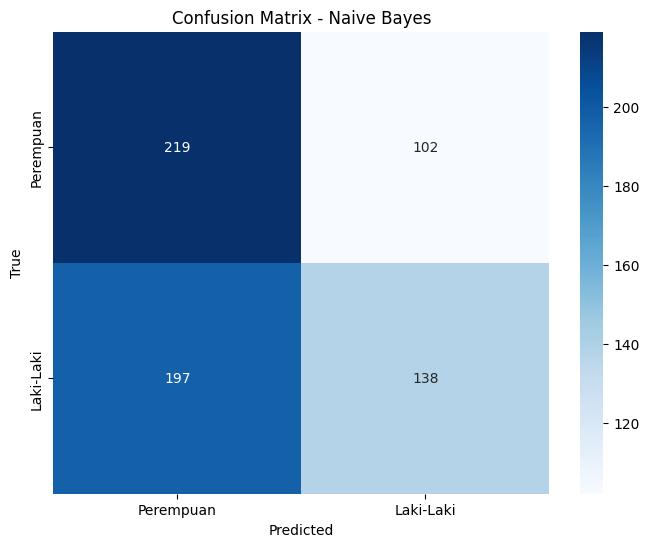

time: 322 ms (started: 2024-07-22 08:20:55 +00:00)


In [33]:
# Buat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Perempuan', 'Laki-Laki'], yticklabels=['Perempuan', 'Laki-Laki'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_nb.png')
plt.show()

In [34]:
# Simpan model ke dalam file
model_file = 'nb.pkl'
joblib.dump(best_model_nb, model_file)
print(f"Model telah disimpan sebagai {model_file}")

Model telah disimpan sebagai nb.pkl
time: 3.22 ms (started: 2024-07-22 08:20:55 +00:00)


### 4. Decision Tree

In [35]:
# Bangun Arsitektur Klasifikasi dengan Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Definisikan model DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)

# Tentukan grid dari hyperparameter yang dicoba
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

time: 723 µs (started: 2024-07-22 08:20:55 +00:00)


In [36]:
# Lakukan grid search dengan cross-validation 5-fold
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor Cross-Validation terbaik
print("Parameter terbaik Decision Tree:", grid_search_dt.best_params_)
print("Skor Cross-Validation terbaik:", grid_search_dt.best_score_)

Parameter terbaik Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Skor Cross-Validation terbaik: 0.6368157033805888
time: 9.57 s (started: 2024-07-22 08:20:55 +00:00)


In [37]:
# Evaluasi model terbaik pada data testing
best_model_dt = grid_search_dt.best_estimator_
y_pred_dt = best_model_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt, target_names=['Perempuan', 'Laki-Laki']))

              precision    recall  f1-score   support

   Perempuan       0.58      0.63      0.60       321
   Laki-Laki       0.61      0.56      0.59       335

    accuracy                           0.60       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.60      0.60      0.60       656

time: 13.7 ms (started: 2024-07-22 08:21:05 +00:00)


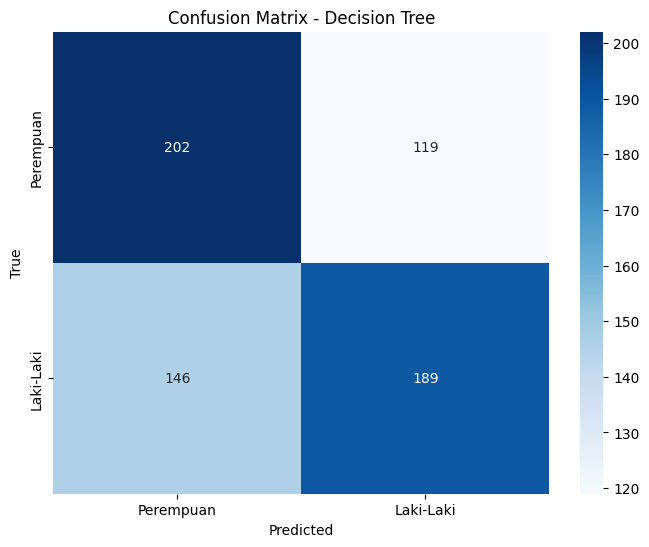

time: 340 ms (started: 2024-07-22 08:21:05 +00:00)


In [38]:
# Buat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Perempuan', 'Laki-Laki'], yticklabels=['Perempuan', 'Laki-Laki'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_dt.png')
plt.show()

In [39]:
# Simpan model ke dalam file
model_file = 'dt.pkl'
joblib.dump(best_model_dt, model_file)
print(f"Model telah disimpan sebagai {model_file}")

Model telah disimpan sebagai dt.pkl
time: 3.46 ms (started: 2024-07-22 08:21:05 +00:00)


### 5. LSTM

In [40]:
import tensorflow
from keras import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import load_model

time: 2.73 s (started: 2024-07-22 08:21:05 +00:00)


In [41]:
def lstm_model(num_alphabets=27, name_length=20, embedding_dim=256):
    model = Sequential([
        Embedding(num_alphabets, embedding_dim, input_length=name_length),
        Bidirectional(LSTM(units=128, recurrent_dropout=0.2, dropout=0.2)),
        Dense(1, activation="sigmoid")
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

time: 704 µs (started: 2024-07-22 08:21:08 +00:00)


In [42]:
model = lstm_model(num_alphabets=27, name_length=20, embedding_dim=256)

time: 1.81 s (started: 2024-07-22 08:21:08 +00:00)


In [43]:
callbacks = [
    EarlyStopping(monitor='val_accuracy',
                  min_delta=1e-3,
                  patience=5,
                  mode='max',
                  restore_best_weights=True,
                  verbose=1),
]

history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=64,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks)

Epoch 1/50
41/41 [==============================] - 12s 104ms/step - loss: 0.6585 - accuracy: 0.5957 - val_loss: 0.5895 - val_accuracy: 0.6829
Epoch 2/50
41/41 [==============================] - 3s 82ms/step - loss: 0.5717 - accuracy: 0.7043 - val_loss: 0.5416 - val_accuracy: 0.7180
Epoch 3/50
41/41 [==============================] - 5s 111ms/step - loss: 0.5432 - accuracy: 0.7260 - val_loss: 0.5420 - val_accuracy: 0.7119
Epoch 4/50
41/41 [==============================] - 4s 85ms/step - loss: 0.5291 - accuracy: 0.7306 - val_loss: 0.5299 - val_accuracy: 0.7363
Epoch 5/50
41/41 [==============================] - 3s 79ms/step - loss: 0.5115 - accuracy: 0.7481 - val_loss: 0.5128 - val_accuracy: 0.7470
Epoch 6/50
41/41 [==============================] - 3s 82ms/step - loss: 0.5056 - accuracy: 0.7561 - val_loss: 0.5300 - val_accuracy: 0.7317
Epoch 7/50
41/41 [==============================] - 5s 111ms/step - loss: 0.5030 - accuracy: 0.7607 - val_loss: 0.5326 - val_accuracy: 0.7363
Epoch 8/5

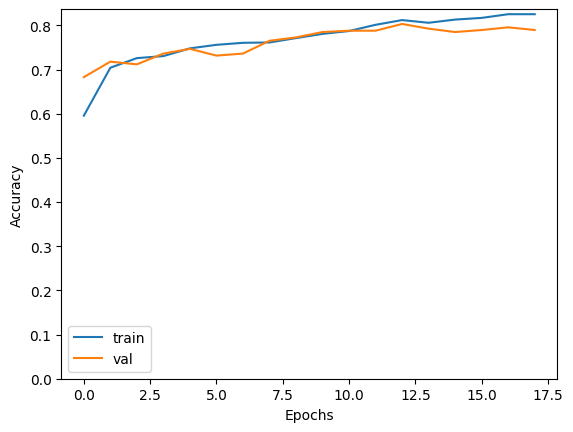

time: 12.9 s (started: 2024-07-22 08:22:23 +00:00)


In [44]:
# Tampilkan Grafik Akurasi
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0)
plt.legend()

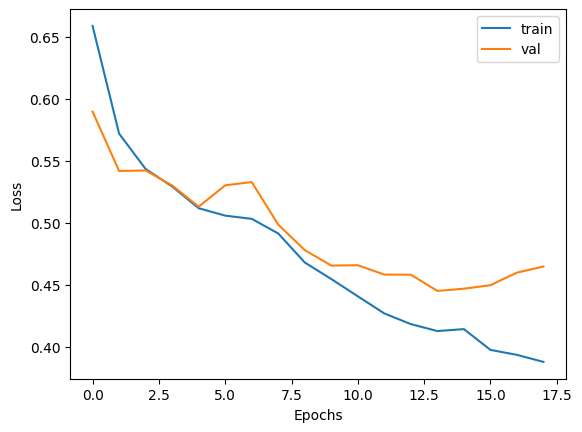

time: 336 ms (started: 2024-07-22 08:22:36 +00:00)


In [45]:
# Tampilkan Grafik Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [46]:
# Tampilkan Akurasi dan Loss
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)
print('Loss:', loss)

21/21 [==============================] - 1s 24ms/step - loss: 0.4579 - accuracy: 0.8034
Accuracy: 0.8033536672592163
Loss: 0.4579451084136963
time: 728 ms (started: 2024-07-22 08:22:37 +00:00)


In [47]:
# Evaluasi model pada data testing
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
report = classification_report(y_test, y_pred, target_names=['Perempuan', 'Laki-Laki'])
print(report)

21/21 [==============================] - 1s 21ms/step
              precision    recall  f1-score   support

   Perempuan       0.80      0.80      0.80       321
   Laki-Laki       0.81      0.80      0.81       335

    accuracy                           0.80       656
   macro avg       0.80      0.80      0.80       656
weighted avg       0.80      0.80      0.80       656

time: 1.38 s (started: 2024-07-22 08:22:37 +00:00)


In [48]:
# Simpan model ke dalam file
model.save('gender_prediction.h5')

time: 52.6 ms (started: 2024-07-22 08:22:39 +00:00)


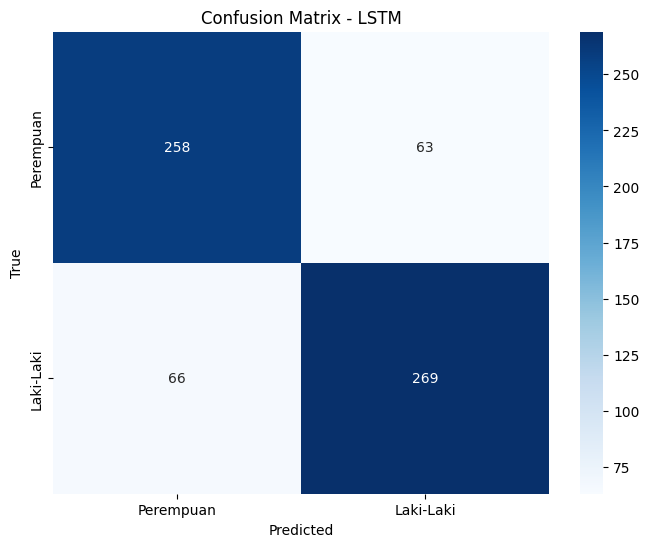

time: 533 ms (started: 2024-07-22 08:22:39 +00:00)


In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Perempuan', 'Laki-Laki'], yticklabels=['Perempuan', 'Laki-Laki'])
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')
plt.show()